In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv(r'/content/Walmart Data Analysis and Forcasting.csv')
df.sort_values(by='CPI',ascending=True)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
4603,33,13-08-2010,265367.51,0,95.57,3.049,126.064000,9.495
1600,12,13-08-2010,928264.40,0,87.01,3.159,126.064000,14.180
4746,34,13-08-2010,951208.65,0,76.72,2.698,126.064000,9.816
3888,28,13-08-2010,1218688.09,0,87.01,3.159,126.064000,14.180
1743,13,13-08-2010,1877592.55,0,74.93,2.837,126.064000,7.951
...,...,...,...,...,...,...,...,...
1142,8,19-10-2012,900309.75,0,62.99,3.594,227.018417,5.124
1143,8,26-10-2012,891671.44,0,64.74,3.506,227.036936,5.124
1284,9,12-10-2012,558464.80,0,60.09,3.601,227.169392,4.954
1285,9,19-10-2012,542009.46,0,68.01,3.594,227.214288,4.954


In [5]:
df['Date'] = pd.to_datetime(df['Date'])

# extract month and year as a string in the format "MM-YYYY"
df['Month_Year'] = df['Date'].dt.strftime('%m-%Y')
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['year'] = df['Date'].dt.year


In [6]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Month_Year', 'month', 'day',
       'year'],
      dtype='object')

In [7]:
df.Unemployment.unique()
CPI_range=[]
for i in df.CPI:
  if i<=100:
    CPI_range.append('100%')
  if 150>=i>100:
    CPI_range.append('100-150%')
  if 200>=i>150:
    CPI_range.append('150-200%')
  if 250>=i>200:
    CPI_range.append('200-250%')

df['CPI_range']=CPI_range

In [8]:
df.Unemployment.unique()
Unemp_range=[]
for i in df.Unemployment:
  if i<=2:
    Unemp_range.append('0-2')
  if 3>=i>2:
    Unemp_range.append('2-3')
  if 4>=i>3:
    Unemp_range.append('3-4')
  if 5>=i>4:
    Unemp_range.append('4-5')
  if 6>=i>5:
    Unemp_range.append('5-6')
  if 7>=i>6:
    Unemp_range.append('6-7')
  if 8>=i>7:
    Unemp_range.append('7-8')
  if 8<i:
    Unemp_range.append('(more)')

df['Unemp_range']=Unemp_range

In [9]:
new=[]
for i in df.Temperature:
  if i<=30:
    new.append('0-30')
  if 40>=i>30:
    new.append('30-40')
  if 50>=i>40:
    new.append('40-50')
  if 60>=i>50:
    new.append('50-60')
  if 70>=i>60:
    new.append('6-70')
  if 80>=i>70:
    new.append('70-80')
  if i>80:
    new.append('80andmore')
df['temp_range']=new
df


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month_Year,month,day,year,CPI_range,Unemp_range,temp_range
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,05-2010,5,2,2010,200-250%,(more),40-50
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,12-2010,12,2,2010,200-250%,(more),30-40
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,02-2010,2,19,2010,200-250%,(more),30-40
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,02-2010,2,26,2010,200-250%,(more),40-50
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,05-2010,5,3,2010,200-250%,(more),40-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,09-2012,9,28,2012,150-200%,(more),6-70
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,05-2012,5,10,2012,150-200%,(more),6-70
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,12-2012,12,10,2012,150-200%,(more),50-60
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,10-2012,10,19,2012,150-200%,(more),50-60


In [10]:
range=[]
for i in df.Fuel_Price:
  if i<=2:
    range.append('0-2')
  if 3>=i>2:
    range.append('2-3')
  if 4>=i>3:
    range.append('3-4')
  if 5>=i>4:
    range.append('4-5')
  if i>5:
    range.append('5more')

df['fuel_range']=range

In [11]:
sale_based_on_emp_rate=df.groupby(['Unemp_range','year'])['Weekly_Sales'].mean().reset_index()
sale_based_on_emp_rate=pd.DataFrame(sale_based_on_emp_rate)
sale_based_on_emp_rate.sort_values(by='year',ascending=True)

,Unemp_range,year,Weekly_Sales
0,(more),2010,1.049378e+06
6,5-6,2010,1.188192e+06
9,6-7,2010,6.738053e+05
12,7-8,2010,1.285722e+06
1,(more),2011,9.354527e+05
4,4-5,2011,1.226963e+06
7,5-6,2011,1.737739e+06
10,6-7,2011,9.136174e+05
13,7-8,2011,1.192386e+06
2,(more),2012,1.003918e+06


In [12]:
sale_based_on_CPI=df.groupby(['CPI_range','year'])['Weekly_Sales'].mean().reset_index()
sale_based_on_CPI=pd.DataFrame(sale_based_on_CPI)
sale_based_on_CPI.sort_values(by='year',ascending=True)

,CPI_range,year,Weekly_Sales
0,100-150%,2010,1.102502e+06
3,150-200%,2010,1.066752e+06
6,200-250%,2010,1.001740e+06
1,100-150%,2011,1.078680e+06
4,150-200%,2011,1.068522e+06
7,200-250%,2011,9.963927e+05
2,100-150%,2012,1.066300e+06
5,150-200%,2012,1.026372e+06
8,200-250%,2012,9.939937e+05


In [13]:
sale_based_on_fuel=df.groupby(['fuel_range','year'])['Weekly_Sales'].mean().reset_index()
sale_based_on_fuel=pd.DataFrame(sale_based_on_fuel)
sale_based_on_fuel.sort_values(by='year',ascending=True)

,fuel_range,year,Weekly_Sales
0,2-3,2010,1.046118e+06
2,3-4,2010,1.125877e+06
1,2-3,2011,9.157622e+05
3,3-4,2011,1.048545e+06
5,4-5,2011,1.094004e+06
4,3-4,2012,1.036539e+06
6,4-5,2012,1.017268e+06


In [14]:
sale_based_on_temp=df.groupby(['temp_range','year'])['Weekly_Sales'].sum().reset_index()
sale_based_on_temp=pd.DataFrame(sale_based_on_temp)
sale_based_on_temp.sort_values(by='year',ascending=True)

,temp_range,year,Weekly_Sales
0,0-30,2010,1.686319e+08
18,80andmore,2010,3.243955e+08
3,30-40,2010,2.028655e+08
15,70-80,2010,4.005101e+08
6,40-50,2010,3.514980e+08
12,6-70,2010,4.419880e+08
9,50-60,2010,3.989972e+08
16,70-80,2011,4.141792e+08
13,6-70,2011,4.457383e+08
19,80andmore,2011,3.426449e+08


In [15]:
df_date_sum_of_sales_on_holidays=df.groupby(['Holiday_Flag','year'])['Weekly_Sales'].sum().reset_index()
df_date_sum_of_sales_on_holidays=pd.DataFrame(df_date_sum_of_sales_on_holidays)
df_date_sum_of_sales_on_holidays.sort_values(by='year',ascending=True)

,Holiday_Flag,year,Weekly_Sales
0,0,2010,2.088662e+09
3,1,2010,2.002246e+08
1,0,2011,2.241465e+09
4,1,2011,2.067355e+08
2,0,2012,1.901793e+09
5,1,2012,9.833947e+07


In [16]:
df_date_sum_of_sales_MY=df.groupby(['Month_Year'])['Weekly_Sales'].sum().reset_index()
df_date_sum_of_sales_MY=pd.DataFrame(df_date_sum_of_sales_MY)
df_date_sum_of_sales_MY
df_date_sum_of_sales_Y=df.groupby(['year'])['Weekly_Sales'].sum().reset_index()
df_date_sum_of_sales_Y=pd.DataFrame(df_date_sum_of_sales_Y)
df_date_sum_of_sales_Y

,year,Weekly_Sales
0,2010,2.288886e+09
1,2011,2.448200e+09
2,2012,2.000133e+09


In [17]:
sale_based_on_holiday_temp=df.groupby(['Holiday_Flag','temp_range'])['Weekly_Sales'].sum().reset_index()
sale_based_on_holiday_temp=pd.DataFrame(sale_based_on_holiday_temp)
sale_based_on_holiday_temp

,Holiday_Flag,temp_range,Weekly_Sales
0,0,0-30,3.323023e+08
1,0,30-40,5.581516e+08
2,0,40-50,8.468944e+08
3,0,50-60,1.078951e+09
4,0,6-70,1.228745e+09
5,0,70-80,1.229653e+09
6,0,80andmore,9.572223e+08
7,1,0-30,8.802138e+07
8,1,30-40,9.102512e+07
9,1,40-50,1.171903e+08


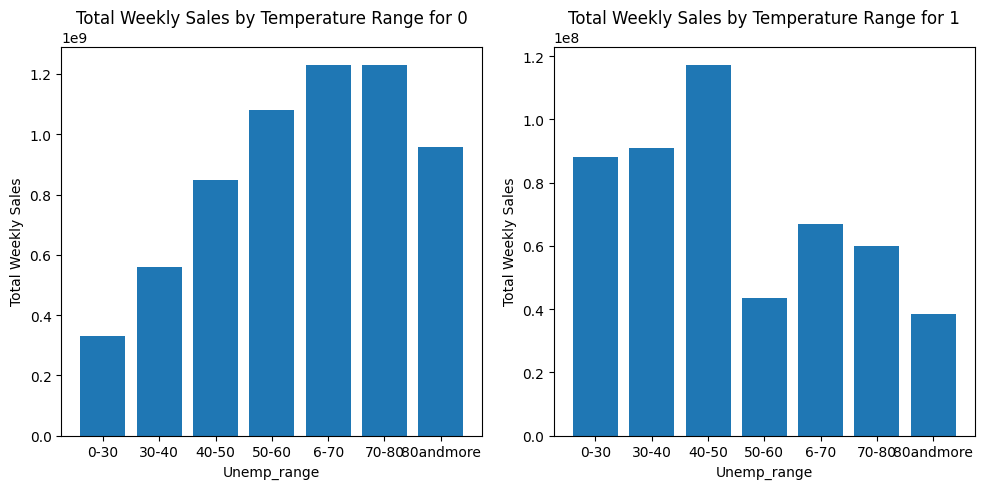

In [18]:

# create a separate bar for each year
years=sale_based_on_holiday_temp['Holiday_Flag'].unique()
num_years=len(years)
fig, axes = plt.subplots(nrows=1, ncols=num_years, figsize=(5*num_years,5))

# loop through each year and create a bar graph
for i, year in enumerate(years):
    year_data = sale_based_on_holiday_temp[sale_based_on_holiday_temp['Holiday_Flag'] == year]
    temp_ranges = year_data['temp_range']
    sales = year_data['Weekly_Sales']
    x_pos = np.arange(len(temp_ranges))

    axes[i].bar(x_pos, sales)
    axes[i].set_xticks(x_pos)
    axes[i].set_xticklabels(temp_ranges)
    axes[i].set_xlabel('Unemp_range')
    axes[i].set_ylabel('Total Weekly Sales')
    axes[i].set_title(f'Total Weekly Sales by Temperature Range for {year}')

plt.tight_layout()
plt.show()

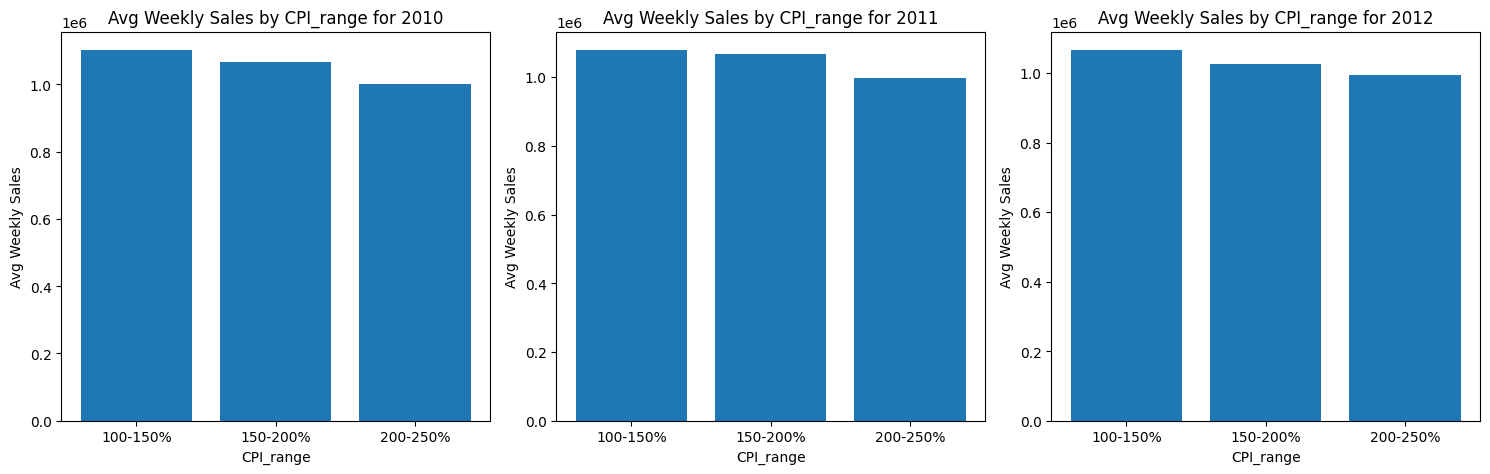

In [19]:

# create a separate bar for each year
years=sale_based_on_CPI['year'].unique()
num_years=len(years)
fig, axes = plt.subplots(nrows=1, ncols=num_years, figsize=(5*num_years,5))

# loop through each year and create a bar graph
for i, year in enumerate(years):
    year_data = sale_based_on_CPI[sale_based_on_CPI['year'] == year]
    temp_ranges = year_data['CPI_range']
    sales = year_data['Weekly_Sales']
    x_pos = np.arange(len(temp_ranges))

    axes[i].bar(x_pos, sales)
    axes[i].set_xticks(x_pos)
    axes[i].set_xticklabels(temp_ranges)
    axes[i].set_xlabel('CPI_range')
    axes[i].set_ylabel('Avg Weekly Sales')
    axes[i].set_title(f'Avg Weekly Sales by CPI_range for {year}')

plt.tight_layout()
plt.show()

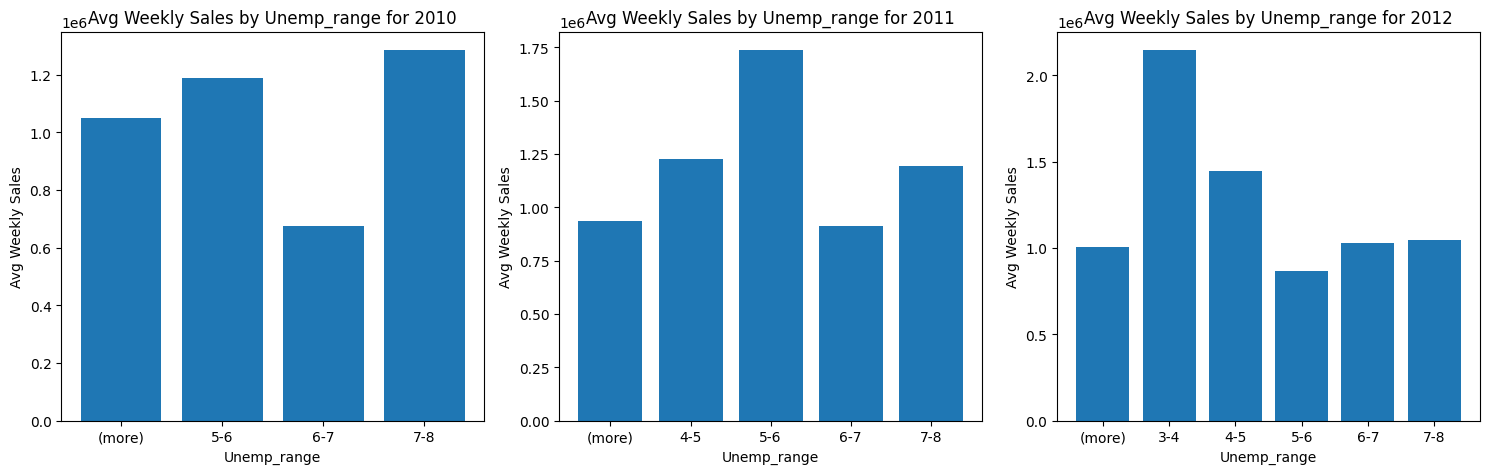

In [20]:

# create a separate bar for each year
years=sale_based_on_emp_rate['year'].unique()
num_years=len(years)
fig, axes = plt.subplots(nrows=1, ncols=num_years, figsize=(5*num_years,5))

# loop through each year and create a bar graph
for i, year in enumerate(years):
    year_data = sale_based_on_emp_rate[sale_based_on_emp_rate['year'] == year]
    temp_ranges = year_data['Unemp_range']
    sales = year_data['Weekly_Sales']
    x_pos = np.arange(len(temp_ranges))

    axes[i].bar(x_pos, sales)
    axes[i].set_xticks(x_pos)
    axes[i].set_xticklabels(temp_ranges)
    axes[i].set_xlabel('Unemp_range')
    axes[i].set_ylabel('Avg Weekly Sales')
    axes[i].set_title(f'Avg Weekly Sales by Unemp_range for {year}')

plt.tight_layout()
plt.show()

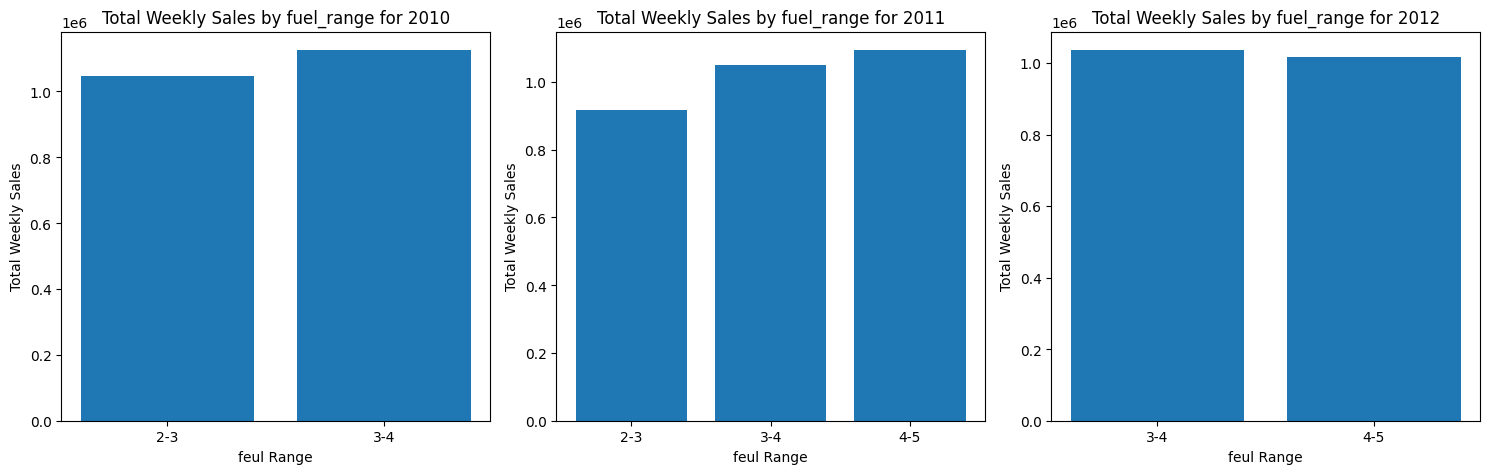

In [21]:

# create a separate bar for each year
years=sale_based_on_fuel['year'].unique()
num_years=len(years)
fig, axes = plt.subplots(nrows=1, ncols=num_years, figsize=(5*num_years,5))

# loop through each year and create a bar graph
for i, year in enumerate(years):
    year_data = sale_based_on_fuel[sale_based_on_fuel['year'] == year]
    fuel_range = year_data['fuel_range']
    sales = year_data['Weekly_Sales']
    x_pos = np.arange(len(fuel_range))

    axes[i].bar(x_pos, sales)
    axes[i].set_xticks(x_pos)
    axes[i].set_xticklabels(fuel_range)
    axes[i].set_xlabel('feul Range')
    axes[i].set_ylabel('Total Weekly Sales')
    axes[i].set_title(f'Total Weekly Sales by fuel_range for {year}')

plt.tight_layout()
plt.show()

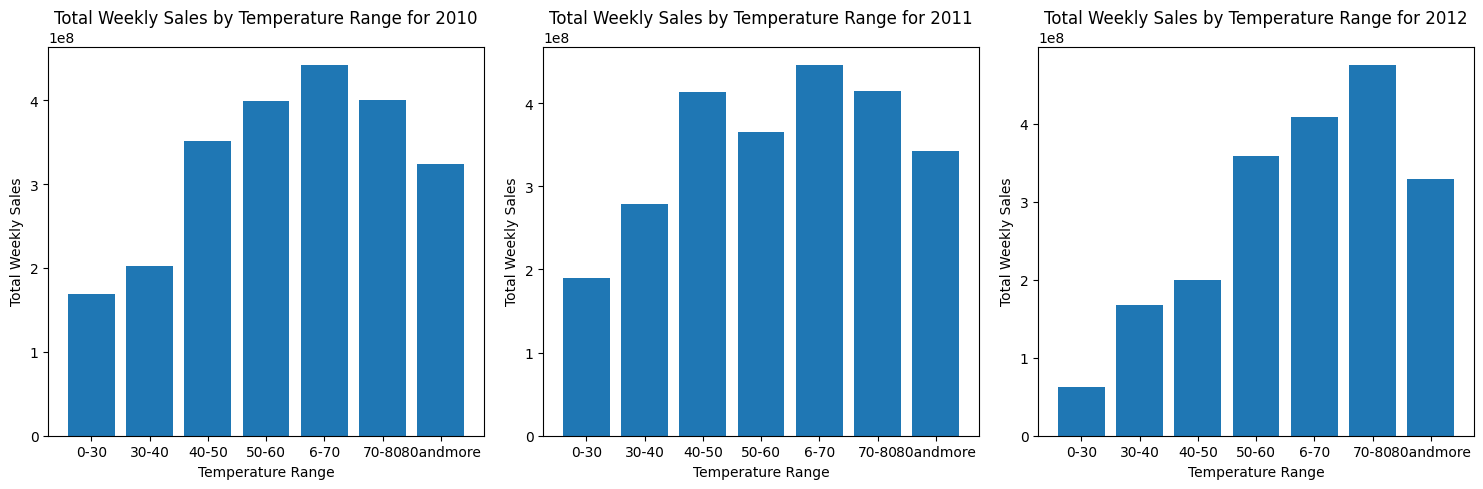

In [22]:

# create a separate bar for each year
years=sale_based_on_temp['year'].unique()
num_years=len(years)
fig, axes = plt.subplots(nrows=1, ncols=num_years, figsize=(5*num_years,5))

# loop through each year and create a bar graph
for i, year in enumerate(years):
    year_data = sale_based_on_temp[sale_based_on_temp['year'] == year]
    temp_ranges = year_data['temp_range']
    sales = year_data['Weekly_Sales']
    x_pos = np.arange(len(temp_ranges))

    axes[i].bar(x_pos, sales)
    axes[i].set_xticks(x_pos)
    axes[i].set_xticklabels(temp_ranges)
    axes[i].set_xlabel('Temperature Range')
    axes[i].set_ylabel('Total Weekly Sales')
    axes[i].set_title(f'Total Weekly Sales by Temperature Range for {year}')

plt.tight_layout()
plt.show()

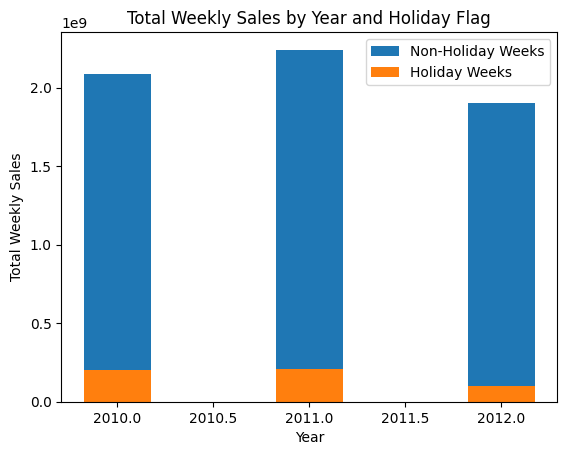

In [23]:
# create a bar graph to compare total weekly sales for holiday vs. non-holiday weeks
bar_width = 0.35
fig, ax = plt.subplots()
bar1 = ax.bar(df_date_sum_of_sales_on_holidays[df_date_sum_of_sales_on_holidays['Holiday_Flag'] == 0]['year'], df_date_sum_of_sales_on_holidays[df_date_sum_of_sales_on_holidays['Holiday_Flag'] == 0]['Weekly_Sales'], bar_width, label='Non-Holiday Weeks')
bar2 = ax.bar(df_date_sum_of_sales_on_holidays[df_date_sum_of_sales_on_holidays['Holiday_Flag'] == 1]['year'], df_date_sum_of_sales_on_holidays[df_date_sum_of_sales_on_holidays['Holiday_Flag'] == 1]['Weekly_Sales'], bar_width, label='Holiday Weeks')

# add title and axis labels
ax.set_title('Total Weekly Sales by Year and Holiday Flag')
ax.set_xlabel('Year')
ax.set_ylabel('Total Weekly Sales')

# add legend
ax.legend()

# show the graph
plt.show()